# Ejercicios del Tema 11 

## Socket

Sintaxis:

        socket.socket(family=AF_INET, type=SOCK_STREAM, proto=0, fileno=None)

La función socket, crea un nuevo socket utilizando la familia de direcciones (family), el tipo de socket y el número de protocolo dados.

    •	La familia de direcciones y protocolos utilizadas para el primer argumento de socket. 
        Las opciones deben ser AF_INET (la predeterminada), AF_INET6, AF_UNIX, AF_CAN, AF_PACKET 
        o AF_RDS. 
    •	El tipo de conector debe ser SOCK_STREAM (el predeterminado), SOCK_DGRAM, SOCK_RAW o 
        quizás una de las otras constantes SOCK_. 
        o	SOCK_STREAM (Sockets de flujo) usa como base el protocolo TCP (Transmission Control 
            Protocol). En teoría asegura que los mensajes enviados a destino lleguen en el mismo
            orden en el que fueron enviados.
        o	SOCK_DGRAM (Sockets de datagrama) es especial para trabajar con el protocolo UDP  
            (User Datagram Protocol), a diferencia del anterior los mensajes pueden llegar en 
            distinto orden en el que originalmente fueron enviados.
    •	El número de protocolo suele ser cero y puede omitirse o, en el caso de que la familia de
        direcciones sea AF_CAN, el protocolo debe ser uno de CAN_RAW, CAN_BCM, CAN_ISOTP o 
        CAN_J1939.
    •	Si se especifica fileno, los valores de family, type y proto se detectan automáticamente
        desde el descriptor de archivo especificado.
        
https://docs.python.org/3.6/library/socket.html?highlight=socket#socket.socket


In [10]:
import socket

mysock = socket.socket(socket.AF_INET,socket.SOCK_STREAM )
mysock.connect(('data.pr4e.org', 80))  
mysock

<socket.socket fd=1864, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.79', 64991), raddr=('192.241.136.170', 80)>

Hasta ahora, hemos creado una conexión con un socket y luego lo conectamos a un puerto en particular en ordenador. Es decir, hemos creado la capa de extremo a extremo más baja en el modelo TCPIP. 

El siguiente paso es enviar y recibir datos. 

    1. Lo primero que hace,  es realizar una solicitud, el servidor lo recibe, lee algunos archivos y envía los datos de vuelta.  
    2. Utilizamos un bucle while para retener la conexión y con el método recv(), es un método en el objeto socket que obtiene todos los datos. 
    3. Cuando nosotros establecemos una conversación utilizando sockets o con una BBDD, nosotros tenemos que codificar y decodificar la data (bytes).  
    4. La función decode() devuelve una cadena descodificada de los bytes especificados. La codificación predeterminada es 'utf-8'.  
    5. Mientras encode() devuelve una versión codificada de la cadena como un objeto bytes. La codificación predeterminada es 'utf-8'. 


In [11]:
mi_string = "Este es un ejemplo de un string....!!!"
mi_string_encode = mi_string.encode(encoding='utf-8');

print("Encoded String: ", mi_string_encode)
print("Decoded String: ", mi_string_encode.decode('utf-8'))


Encoded String:  b'Este es un ejemplo de un string....!!!'
Decoded String:  Este es un ejemplo de un string....!!!


In [12]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/words.txt HTTP/1.0\r\n\r\n'.encode()  # UTF-8 y \r\n\r\nfinal de la cabecera
mysock.send(cmd)

while True:
    data = mysock.recv(512) # Tamaño del buffer 
    if len(data) < 1:
        break
    print(data.decode(),end='')  

mysock.close()

HTTP/1.1 200 OK
Date: Thu, 07 Apr 2022 18:19:12 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "493-54f6609245537"
Accept-Ranges: bytes
Content-Length: 1171
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain

Writing programs or programming is a very creative
and rewarding activity  You can write programs for
many reasons ranging from making your living to solving
a difficult data analysis problem to having fun to helping
someone else solve a problem  This book assumes that
{\em everyone} needs to know how to program and that once
you know how to program, you will figure out what you want
to do with your newfound skills

We are surrounded in our daily lives with computers ranging
from laptops to cell phones  We can think of these computers
as our personal assistants who can take care of many things
on our behalf  The hardware in our curren

In [13]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/intro.txt HTTP/1.0\r\n\r\n'.encode()  # UTF-8 y \r\n\r\nfinal de la cabecera
mysock.send(cmd)

while True:
    data = mysock.recv(512) # Tamaño del buffer 
    if len(data) < 1:
        break
    print(data.decode(),end='')  

mysock.close()

HTTP/1.1 200 OK
Date: Thu, 07 Apr 2022 18:21:53 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "6dbe-54f6609240717"
Accept-Ranges: bytes
Content-Length: 28094
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain


Why should you learn to write programs?

Writing programs (or programming) is a very creative 
and rewarding activity.  You can write programs for 
many reasons, ranging from making your living to solving
a difficult data analysis problem to having fun to helping
someone else solve a problem.  This book assumes that 
everyone needs to know how to program, and that once 
you know how to program you will figure out what you want 
to do with your newfound skills.  

We are surrounded in our daily lives with computers ranging 
from laptops to cell phones.  We can think of these computers
as our personal assistants who can take care of 

In [14]:
import socket
import time
SERVIDOR = 'data.pr4e.org'
PUERTO = 80

misock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
misock.connect((SERVIDOR, PUERTO))
misock.sendall(b'GET http://data.pr4e.org/cover3.jpg HTTP/1.0\r\n\r\n')
contador = 0
imagen = b""

while True:
    datos = misock.recv(5120)
    if len(datos) < 1: break
    contador = contador + len(datos)
    imagen = imagen + datos

misock.close()

# Búsqueda del final de la cabecera

pos = imagen.find(b"\r\n\r\n")
print('Header length', pos)
print(imagen[:pos].decode())

# Ignorar la cabecera y guardar los datos de la imagen

imagen = imagen[pos+4:]
fichero = open("portada.jpg", "wb")
fichero.write(imagen)
fichero.close()

Header length 394
HTTP/1.1 200 OK
Date: Thu, 07 Apr 2022 18:25:11 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Mon, 15 May 2017 12:27:40 GMT
ETag: "38342-54f8f2e5b6277"
Accept-Ranges: bytes
Content-Length: 230210
Vary: Accept-Encoding
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: image/jpeg


In [15]:
# An example script to connect to Google using socket  
# programming in Python  
import socket # for socket  
import sys  
  
try:  
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)  
    print("Socket successfully created") 
except socket.error as err:  
    print("socket creation failed with error %s" %(err)) 
  
# default port for socket  
port = 80
  
try:  
    host_ip = socket.gethostbyname('www.google.com')  
except socket.gaierror:  
  
    # this means could not resolve the host  
    print("there was an error resolving the host") 
    sys.exit()  
  
# connecting to the server  
s.connect((host_ip, port))  
  
print ("the socket has successfully connected to google") 
host_ip

Socket successfully created
the socket has successfully connected to google


'172.217.17.4'

## URL LIB

### Abrir URL

In [17]:
from urllib.request import urlopen

httpresponse = urlopen('http://www.google.com')  # Retorna un objeto
httpresponse

In [18]:
httpresponse.geturl() # retorna la URL que fue solicitada.

'http://www.google.com'

info() al ejecutar solo este código nos muestra el tipo de objeto que retorna, un objeto HTTPMessage. Este contiene toda la información guardada en el objeto HTTPResponse, para leerla debemos llamar al método HTTPMessage.as_string().

In [19]:
httpresponse.info()

In [20]:
header = httpresponse.info()
header.as_string()

'Date: Thu, 07 Apr 2022 18:32:50 GMT\nExpires: -1\nCache-Control: private, max-age=0\nContent-Type: text/html; charset=ISO-8859-1\nP3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."\nServer: gws\nX-XSS-Protection: 0\nX-Frame-Options: SAMEORIGIN\nSet-Cookie: AEC=AVQQ_LCMyHtejbICuyym4fLB_cu56x9kmvYPc2NEYZ-VXf_I5UufXlYD-Ds; expires=Tue, 04-Oct-2022 18:32:50 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax\nSet-Cookie: NID=511=I8k0hzvA3dlT3oamZfjzipY2zWwCtULzQRUPf6eHY1BioDZJro2CcvPhFKoPrDH1lDDnzbYY4iG0V_Oi8UByjEVtiEIQJCaGbPNx_2TntBEqdiPs__Onqy-eal-W5T9k25SNzqgaWwIFkvsEYsqOJKF0Ji8ldYdKCCoC6VoEx5s; expires=Fri, 07-Oct-2022 18:32:50 GMT; path=/; domain=.google.com; HttpOnly\nAccept-Ranges: none\nVary: Accept-Encoding\nConnection: close\nTransfer-Encoding: chunked\n\n'

In [20]:
httpresponse.getcode() # retorna el código de la solicitud HTTP, en nuestro caso, 200 quiere decir que la solicitud fue exitosa, sin errores.

200

### Descargar Archivos

In [23]:
from urllib.request import urlopen

httpres = urlopen('http://data.pr4e.org/words.txt')

for line in httpres:
    #print(line)
    print(line.decode().strip())

Writing programs or programming is a very creative
and rewarding activity  You can write programs for
many reasons ranging from making your living to solving
a difficult data analysis problem to having fun to helping
someone else solve a problem  This book assumes that
{\em everyone} needs to know how to program and that once
you know how to program, you will figure out what you want
to do with your newfound skills

We are surrounded in our daily lives with computers ranging
from laptops to cell phones  We can think of these computers
as our personal assistants who can take care of many things
on our behalf  The hardware in our current-day computers
is essentially built to continuously ask us the question
What would you like me to do next

Our computers are fast and have vasts amounts of memory and
could be very helpful to us if we only knew the language to
speak to explain to the computer what we would like it to
do next If we knew this language we could tell the
computer to do tasks 

In [24]:
from urllib.request import urlopen

url = 'http://data.pr4e.org/romeo.txt'

response =  urlopen(url)
data = response.read()

with open('prueba.txt', 'wb') as archivo:
    archivo.write(data)

with open('prueba.txt', 'r') as archivo:
    print(archivo.read())    


But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief



Aquí solo abrimos una URL que nos lleva a un archivo TXT guardado en esta página web. Luego leemos los datos y los escribimos en el disco. Al imprimir, vemos que hemos guardado un archivo TXT.  

Un enfoque alternativo, sería usar la función **urlretrieve**:


- El método urlretrieve copia un objeto de red a un archivo local. 

- El archivo que se copia obtiene un nombre aleatorio y va a un directorio temporal a menos que usemos el segundo parámetro del método urlretrieve donde podemos especificar la ubicación donde queremos que el archivo sea guardado.

In [25]:
from urllib.request import urlretrieve

url = 'http://data.pr4e.org/romeo.txt'

archivo_tmp, header = urlretrieve(url)

with open('prueba2.txt', 'wb') as archivo:
     with open(archivo_tmp, 'rb') as tmp: # guarda la ruta donde se guardo el archivo temporal
        archivo.write(tmp.read())

In [26]:
archivo_tmp

'C:\\Users\\msierra\\AppData\\Local\\Temp\\tmp8zm0ajpw'

In [27]:
header

In [32]:
header.as_string()

'Date: Wed, 24 Nov 2021 20:12:08 GMT\nServer: Apache/2.4.18 (Ubuntu)\nLast-Modified: Sat, 13 May 2017 11:22:22 GMT\nETag: "a7-54f6609245537"\nAccept-Ranges: bytes\nContent-Length: 167\nCache-Control: max-age=0, no-cache, no-store, must-revalidate\nPragma: no-cache\nExpires: Wed, 11 Jan 1984 05:00:00 GMT\nConnection: close\nContent-Type: text/plain\n\n'

In [24]:
from urllib.request import urlopen

httpres = urlopen('http://data.pr4e.org/romeo.txt')

for line in httpres:
    print(line.decode().split())

['But', 'soft', 'what', 'light', 'through', 'yonder', 'window', 'breaks']
['It', 'is', 'the', 'east', 'and', 'Juliet', 'is', 'the', 'sun']
['Arise', 'fair', 'sun', 'and', 'kill', 'the', 'envious', 'moon']
['Who', 'is', 'already', 'sick', 'and', 'pale', 'with', 'grief']


In [28]:
from urllib.request import urlopen

httpres = urlopen('http://data.pr4e.org/romeo.txt')

counts = dict()
for line in httpres:
    words = line.decode().split()
    for word in words:
        counts[word] = counts.get(word, 0) + 1

print(counts)

{'But': 1, 'soft': 1, 'what': 1, 'light': 1, 'through': 1, 'yonder': 1, 'window': 1, 'breaks': 1, 'It': 1, 'is': 3, 'the': 3, 'east': 1, 'and': 3, 'Juliet': 1, 'sun': 2, 'Arise': 1, 'fair': 1, 'kill': 1, 'envious': 1, 'moon': 1, 'Who': 1, 'already': 1, 'sick': 1, 'pale': 1, 'with': 1, 'grief': 1}


In [29]:
from urllib.request import urlopen

httpres = urlopen('http://www.dr-chuck.com/page1.htm')

for line in httpres:
    print(line.decode().strip())  # strip quita los espacio sen blanco o un caracter (strip("0"))

<h1>The First Page</h1>
<p>
If you like, you can switch to the
<a href="http://www.dr-chuck.com/page2.htm">
Second Page</a>.
</p>


In [30]:
from urllib.request import urlopen

httpres = urlopen('http://www.dr-chuck.com/page1.htm')
for line in httpres:
    contenido = line.decode().strip()
    pos = contenido.find("href=")
    if pos > 0:
        encontrado = contenido[pos+6:-2]
print(encontrado)

http://www.dr-chuck.com/page2.htm


In [31]:
from urllib.request import urlopen
import re

httpres = urlopen('http://www.dr-chuck.com/page1.htm')
for line in httpres:
    contenido = line.decode().strip()
    encontrado = re.findall(r'<a href="(.*?)">', contenido) 
    if len(encontrado) > 0:
        print(encontrado)

['http://www.dr-chuck.com/page2.htm']


In [32]:
from urllib.request import urlopen
import re

httpres = urlopen('http://www.dr-chuck.com/page1.htm')
for line in httpres:
    contenido = line.decode().strip()
    print("linea", contenido)
    encontrado = re.findall(r'<p>(.*?)</p>', contenido) 
    if len(encontrado) > 0:
        print(encontrado)

linea <h1>The First Page</h1>
linea <p>
linea If you like, you can switch to the
linea <a href="http://www.dr-chuck.com/page2.htm">
linea Second Page</a>.
linea </p>


### urllib.parse

El módulo urllib.parse define una interfaz estándar para dividir las cadenas de la URL en componentes (esquema de direccionamiento, ubicación de red, ruta, etc.), para combinar los componentes en una cadena de URL y convertir una "URL relativa" en una URL absoluta dada una "URL base".  

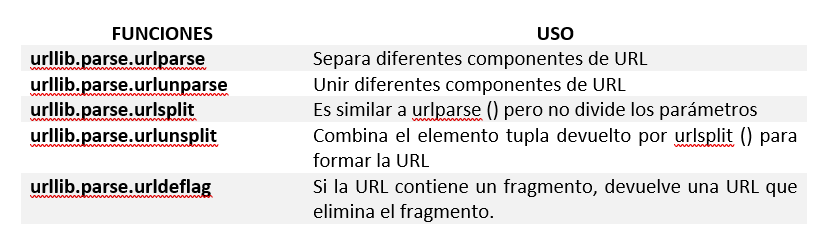

In [4]:
from urllib.parse import urlparse

result = urlparse('https://duckduckgo.com/?q=python&t=ffab&ia=web')
result

ParseResult(scheme='https', netloc='duckduckgo.com', path='/', params='', query='q=python&t=ffab&ia=web', fragment='')

In [33]:
result.netloc

'duckduckgo.com'

In [34]:
result.geturl()

'https://duckduckgo.com/?q=python&t=ffab&ia=web'

In [35]:
result.port

In [36]:
from urllib.parse import * 

parse_url = urlparse('https://www.geeksforgeeks.org/python-langtons-ant/') 
print(parse_url)  # Separa diferentes componentes de URL
print("----------------")


ParseResult(scheme='https', netloc='www.geeksforgeeks.org', path='/python-langtons-ant/', params='', query='', fragment='')
----------------


In [37]:
unparse_url = urlunparse(parse_url) 
print(unparse_url) # Une diferentes componentes de URL
print("----------------")

https://www.geeksforgeeks.org/python-langtons-ant/
----------------


In [39]:
from urllib.parse import * 

url='https://www.geeksforgeeks.org/python-langtons-ant/'

urlsplit_url = urlsplit(url) # Es similar a urlparse () pero no divide los parámetros
print(urlsplit_url )
print("----------------")

urlunsplit_url  = urlunsplit(urlsplit_url)
print(urlunsplit_url) # Combina el elemento tupla devuelto por urlsplit () para formar la URL
print("----------------")

SplitResult(scheme='https', netloc='www.geeksforgeeks.org', path='/python-langtons-ant/', query='', fragment='')
----------------
https://www.geeksforgeeks.org/python-langtons-ant/
----------------


In [167]:
### Enviando un formulario

In [41]:
from urllib.request import urlopen
from urllib.parse import urlencode

# 'https://duckduckgo.com/?q=python&t=ffab&ia=web'

data = urlencode({'q':'mongodb', 'ia':'web'}) # q=python&ia=web

url = 'http://www.duckduckgo.com/?{}'.format(data)
#print(url)
response = urlopen(url)

with open('results.html', 'wb') as file:
     file.write(response.read())

with open('results.html', 'r') as file:
     print(file.read())

<!DOCTYPE html><html lang="en-US" class="no-js has-zcm  no-theme is-link-style-exp is-link-order-exp is-link-breadcrumb-exp is-related-search-exp is-vertical-tabs-exp"><head><meta name="description" content="DuckDuckGo. Privacy, Simplified."><meta http-equiv="content-type" content="text/html; charset=utf-8"><title>mongodb at DuckDuckGo</title><link rel="stylesheet" href="/s2053.css" type="text/css"><link rel="stylesheet" href="/r2053.css" type="text/css"><meta name="robots" content="noindex,nofollow"><meta name="referrer" content="origin"><meta name="apple-mobile-web-app-title" content="mongodb"><link rel="preconnect" href="https://links.duckduckgo.com"><link rel="preload" href="/font/ProximaNova-Reg-webfont.woff2" as="font" type="font/woff2" crossorigin="anonymous" /><link rel="preload" href="/font/ProximaNova-Sbold-webfont.woff2" as="font" type="font/woff2" crossorigin="anonymous" /><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" /><link id="icon60" rel="apple-touch

In [42]:
from urllib.request import urlopen
from urllib.parse import urlencode

# 'https://duckduckgo.com/?q=python&t=ffab&ia=web'

data = urlencode({'q':'coronavirus', 'ia':'web'}) # q=python&ia=web

url = 'http://www.duckduckgo.com/?{}'.format(data)
#print(url)
response = urlopen(url)

with open('results.html', 'wb') as file:
     file.write(response.read())

with open('results.html', 'r') as file:
     print(file.read())

<!DOCTYPE html><html lang="en-US" class="no-js has-zcm  no-theme is-link-style-exp is-link-order-exp is-link-breadcrumb-exp is-related-search-exp is-vertical-tabs-exp"><head><meta name="description" content="DuckDuckGo. Privacy, Simplified."><meta http-equiv="content-type" content="text/html; charset=utf-8"><title>coronavirus at DuckDuckGo</title><link rel="stylesheet" href="/s2053.css" type="text/css"><link rel="stylesheet" href="/r2053.css" type="text/css"><meta name="robots" content="noindex,nofollow"><meta name="referrer" content="origin"><meta name="apple-mobile-web-app-title" content="coronavirus"><link rel="preconnect" href="https://links.duckduckgo.com"><link rel="preload" href="/font/ProximaNova-Reg-webfont.woff2" as="font" type="font/woff2" crossorigin="anonymous" /><link rel="preload" href="/font/ProximaNova-Sbold-webfont.woff2" as="font" type="font/woff2" crossorigin="anonymous" /><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" /><link id="icon60" rel="app

In [43]:
from urllib.request import *
from urllib.parse import * 

url='https://www.tutorialspoint.com/index.htm'
values= {'q':'Python Data Persistence'}

data = urlencode(values).encode('utf-8') 
#print(data)

req = Request(url, data)
resp = urlopen(req)
#print(resp)

respData = resp.read()
print(respData)

b'<!DOCTYPE html> \r\n<html lang="en-US"> \r\n<head>\r\n<title>Biggest Online Tutorials Library</title>\r\n<meta charset="utf-8">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">\r\n<meta name="Description" content="Biggest Online Tutorials Library - The Best Content on latest technologies including C, C++, Java, Python, PHP, Machine Learning, Data Science, AppML, AI with Python, Behave, Java16, Spacy."/>\r\n<meta name="Keywords" content="HTML, Python, CSS, SQL, JavaScript, How to, PHP, Java, C++, jQuery, Bootstrap, C#, XML, MySQL, NodeJS, React, Angular, R, AI, Git, Data Science, Code Game, Tutorials, Programming, Web Development, Training, Learning, Quiz, Courses, Lessons, References, Examples, Source code, Demos, Tips"/>\r\n<link rel="canonical" href="https://www.tutorialspoint.com" />\r\n<link rel="stylesheet" href="/themes/home/tp-home.css?v=1.51" />\r\n</head>\t\r\n<body>\r\n<!-- top 

### URL Error 

In [30]:
from urllib.request import urlopen
  
# Realizar esta prueba sin conexión a internet

try: 
    x = urlopen('https://www.google.com') 
    print(x.read()) 
except Exception as e : 
    print("Ha ocurrido un error", str(e)) 

Ha ocurrido un error <urlopen error [Errno 11001] getaddrinfo failed>


### HTTP Error 

In [46]:
from urllib.request import urlopen
  
try: 
    x = urlopen('https://www.google.com / search?q = test') 
    print(x.read()) 
    
except Exception as e : 
    print("Ha ocurrido un error...", str(e)) 

Ha ocurrido un error... URL can't contain control characters. 'www.google.com ' (found at least ' ')


### Otros Ejemplos

In [45]:
from urllib.request import *
from urllib.parse import *
import re 

url = 'https://www.geeksforgeeks.org/'
values = {'s':'Python 3 basics', 
          'submit':'search'} 

data = urlencode(values).encode('utf-8')           
            
req = Request(url, data) 
#print(req)
resp = urlopen(req)     
         
respData = resp.read()  
paragraphs = re.findall(r'<p>(.*?)</p>', str(respData)) 
  
for eachP in paragraphs: 
    print(eachP) 

Python was developed by Guido van Rossum in the early 1990s and its latest version is 3.7.1, we can simply call it as Python3. Python\xe2\x80\xa6 <span class="read-more"><a href="https://www.geeksforgeeks.org/python-3-basics/">Read More</a></span>
OOP or Object-Oriented Programming is a programming paradigm that organizes software design around data or objects and relies on the concept of classes and objects,\xe2\x80\xa6 <span class="read-more"><a href="https://www.geeksforgeeks.org/8-tips-for-object-oriented-programming-in-python/">Read More</a></span>
Apache Kafka is a publish-subscribe messaging queue used for real-time streams of data. Apache Kafka lets you send and receive messages between various Microservices. In\xe2\x80\xa6 <span class="read-more"><a href="https://www.geeksforgeeks.org/introduction-to-confluent-kafka-python-producer/">Read More</a></span>
Apache Kafka is a publish-subscribe messaging queue used for real-time streams of data. Apache Kafka lets you send and recei

In [46]:
respData

b'<!DOCTYPE html>\r\n<!--[if IE 7]>\r\n<html class="ie ie7" lang="en-US" prefix="og: http://ogp.me/ns#">\r\n<![endif]-->\r\n<!--[if IE 8]>\r\n<html class="ie ie8" lang="en-US" prefix="og: http://ogp.me/ns#">\r\n<![endif]-->\r\n<!--[if !(IE 7) | !(IE 8)  ]><!-->\r\n<html lang="en-US" prefix="og: http://ogp.me/ns#" >\r\n\r\n<!--<![endif]-->\r\n<head>\r\n<meta charset="UTF-8" />\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1"> \r\n\r\n<link rel="shortcut icon" href="https://media.geeksforgeeks.org/wp-content/cdn-uploads/gfg_favicon.png" type="image/x-icon" />\r\n<meta name="theme-color" content="#308D46" />\r\n\r\n<meta name="image" property="og:image" content="https://media.geeksforgeeks.org/wp-content/cdn-uploads/gfg_200x200-min.png">\r\n<meta property="og:image:type" content="image/png">\r\n<meta property="og:image:width" content="200">\r\n<meta property="og:image:height" content="200">\r\n<script defer src="https://apis.google.com/js/platform.js

In [47]:
from urllib.request import *
from urllib.parse import *
import re 
   
url = 'https://www.geeksforgeeks.org/'
values = {'s':'pandas', 
          'submit':'search'} 
   
data = urlencode(values) 
data = data.encode('utf-8') 
req = Request(url, data) 
resp = urlopen(req) 
respData = resp.read() 
   
paragraphs = re.findall(r'<p>(.*?)</p>',str(respData)) 
   
for eachP in paragraphs: 
    print(eachP) 

In this article, we are going to see how to utilize Pandas DataFrame and series for data wrangling. The process of cleansing and integrating dirty\xe2\x80\xa6 <span class="read-more"><a href="https://www.geeksforgeeks.org/how-to-utilise-pandas-dataframe-and-series-for-data-wrangling/">Read More</a></span>
In this article, we will be looking toward the functionality of pandas.api.types.is_file_like() from the pandas.api.types module with its various examples in the Python language. An\xe2\x80\xa6 <span class="read-more"><a href="https://www.geeksforgeeks.org/python-pandas-pandas-api-types-is_file_like-function/">Read More</a></span>
In this article, we will discuss how to randomly select columns from the Pandas Dataframe. According to our requirement, we can randomly select columns from\xe2\x80\xa6 <span class="read-more"><a href="https://www.geeksforgeeks.org/randomly-select-columns-from-pandas-dataframe/">Read More</a></span>
In this article, we will cover how to check whether two int

In [48]:
import urllib.request 
import urllib.parse 
import re 
   
url = 'https://www.geeksforgeeks.org/'
values = {'s':'MongoDB', 
          'submit':'search'} 
   
data = urllib.parse.urlencode(values) 
data = data.encode('utf-8') 
req = urllib.request.Request(url, data) 
resp = urllib.request.urlopen(req) 
respData = resp.read() 
   
paragraphs = re.findall(r'<p>(.*?)</p>',str(respData)) 
   
for eachP in paragraphs: 
    print(eachP) 

Connecting your server to is a database a very crucial task in back-end development as the database is the location where the user-provided data will\xe2\x80\xa6 <span class="read-more"><a href="https://www.geeksforgeeks.org/how-to-wait-for-mongodb-connection-to-be-made-before-creating-http-server-in-node-js/">Read More</a></span>
Node.js is a built-in JavaScript Chrome platform to easily build faster and more flexible network applications. Node.js uses an event-driven, uninterrupted I / O model\xe2\x80\xa6 <span class="read-more"><a href="https://www.geeksforgeeks.org/how-to-connect-mongodb-database-in-a-node-js-applications/">Read More</a></span>
MongoDB was developed by Dwight Merriman and Eliot Horowitz, they encountered development and scalability issues with traditional RDBMS while building web applications at DoubleClick, a\xe2\x80\xa6 <span class="read-more"><a href="https://www.geeksforgeeks.org/how-to-install-mongodb-enterprise-in-linux/">Read More</a></span>
MongoDB is a pla

In [49]:
import urllib.request 
import urllib.parse 
import re 
   
url = 'https://www.geeksforgeeks.org/'
values = {'s':'MongoDB', 
          'submit':'search'} 
   
data = urllib.parse.urlencode(values) 
data = data.encode('utf-8') 
req = urllib.request.Request(url, data) 
resp = urllib.request.urlopen(req) 
respData = resp.read() 
   
paragraphs = re.findall(r'<a href="(.*?)">',str(respData)) 
   
for eachP in paragraphs: 
    print(eachP) 

https://www.geeksforgeeks.org/" aria-label="Logo" class="header-main__logo
https://www.geeksforgeeks.org/must-do-coding-questions-for-product-based-companies/?ref=ghm" target="_self
https://practice.geeksforgeeks.org/topic-tags/" target="_self
https://practice.geeksforgeeks.org/company-tags" target="_self
https://www.geeksforgeeks.org/analysis-of-algorithms-set-1-asymptotic-analysis/?ref=ghm" target="_self
https://www.geeksforgeeks.org/analysis-of-algorithms-set-2-asymptotic-analysis/?ref=ghm" target="_self
https://www.geeksforgeeks.org/analysis-of-algorithms-set-3asymptotic-notations/?ref=ghm" target="_self
https://www.geeksforgeeks.org/analysis-of-algorithems-little-o-and-little-omega-notations/?ref=ghm" target="_self
https://www.geeksforgeeks.org/lower-and-upper-bound-theory/?ref=ghm" target="_self
https://www.geeksforgeeks.org/analysis-of-algorithms-set-4-analysis-of-loops/?ref=ghm" target="_self
https://www.geeksforgeeks.org/analysis-algorithm-set-4-master-method-solving-recurrenc

## urllib3

In [23]:
!python -m pip install urllib3

In [50]:
import urllib3

In [58]:
url = 'https://www.python.org/' 

http = urllib3.PoolManager() 
r = http.request('GET', url)
r.data

b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black"

In [54]:
r

In [57]:
r.status

200

In [16]:
r.headers

HTTPHeaderDict({'Connection': 'keep-alive', 'Content-Length': '50710', 'Server': 'nginx', 'Content-Type': 'text/html; charset=utf-8', 'X-Frame-Options': 'DENY', 'Via': '1.1 vegur, 1.1 varnish, 1.1 varnish', 'Accept-Ranges': 'bytes', 'Date': 'Fri, 26 Nov 2021 18:56:42 GMT', 'Age': '777', 'X-Served-By': 'cache-bwi5122-BWI, cache-mad22061-MAD', 'X-Cache': 'HIT, HIT', 'X-Cache-Hits': '4, 2', 'X-Timer': 'S1637953003.969043,VS0,VE0', 'Vary': 'Cookie', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains'})

In [59]:
r.headers["Server"]

'nginx'

In [60]:
r.

<bound method HTTPResponse.geturl of <urllib3.response.HTTPResponse object at 0x000001A47FC2F460>>

In [61]:
import urllib3


http = urllib3.PoolManager()

url = 'https://www.python.org/' 
resp = http.request('HEAD', url)

print(resp.headers['Server'])
print(resp.headers['Date'])
print(resp.headers['Content-Type'])


nginx
Thu, 07 Apr 2022 19:28:45 GMT
text/html; charset=utf-8


In [62]:
import urllib3, shutil 

url = 'https://www.python.org/' 

c = urllib3.PoolManager() 

filename = "python.txt"

with c.request('GET', url, preload_content=False) as res:
    with open(filename, 'wb') as out_file:
        shutil.copyfileobj(res, out_file)

In [63]:
url = "https://cflvdg.avoz.es/sc/JJ11XK4rpXWDpjzaTALyPz9bhnQ=/x/2020/08/27/00121598518381871168995/Foto/foto1.jpg"

c = urllib3.PoolManager() 

filename = "imagen.jpg"

with c.request('GET', url, preload_content=False) as res:
    with open(filename, 'wb') as out_file:
        shutil.copyfileobj(res, out_file)

In [64]:
url = "https://www.lavozdegalicia.es/noticia/coruna/para-comer/2020/12/10/nova-lua-chea-gastrobar-raices-presentes/00031607613509913282287.htm"

http  = urllib3.PoolManager() 

filename = "noticia.htm"

with http.request('GET', url, preload_content=False) as res:
    with open(filename, 'wb') as out_file:
        shutil.copyfileobj(res, out_file)

In [65]:
import io
import re

url = "https://www.lavozdegalicia.es/noticia/coruna/para-comer/2020/12/10/nova-lua-chea-gastrobar-raices-presentes/00031607613509913282287.htm"

http  = urllib3.PoolManager() 

res = http.request('GET', url, preload_content=False)
res.auto_close = False

# io.TextIOWrapper(res) cambia de binario a un flujo de texto decodificado

for line in io.TextIOWrapper(res): 
    encontrado = re.findall("<p class ='txt'>(.*?)</p>",line)
    if len(encontrado) > 0:
        print(encontrado)

['Lleva más de diez años metida en la hostelería y siete dirigiendo en solitario <strong>Nova Lúa Chea</strong>, un <strong>gastrobar a los pies del mar del Orzán</strong> en el que el cliente puede disfrutar desde un rico desayuno, a un picoteo clásico o una comida, ya sea a la carta o de menú del día, de corte <strong>tradicional con algún que otro toque original</strong>. «La nuestra es una cocina de la de toda la vida, hecha a fuego lento con paciencia y amor. Pero a veces, también nos permitimos nuestras propias licencias», explica la propietaria del negocio Liliana Pedreira. El encargado de dar vida a una carta dinámica pensada para jugar con el producto de temporada y con la que consigue que el cliente pueda probar nuevas propuestas casi en cada visita es Fausto Ruiz. «Tiene un recetario de 1944 escrito a puño y letra por su tatarabuela y se basa mucho en él», comenta la dueña.']
['Su ubicación, a un paso del paseo marítimo, «invita a contar con productos frescos del mar» en la 

## requests

requests es una librería Python que facilita el trabajo con peticiones HTTP.  Es útil, cuando necesitemos realizar peticiones web, ya sea para consumir un API, extraer información de una página o enviar el contenido de un formulario de manera automatizada. 

In [9]:
# pip install requests
!pip install requests

In [2]:
import requests

resp = requests.get('https://www.google.com/')

In [3]:
requests.

SyntaxError: invalid syntax (2849455715.py, line 1)

In [4]:
type(resp)

requests.models.Response

In [5]:
resp.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="es"><head><meta content="Google.es permite acceder a la información mundial en castellano, catalán, gallego, euskara e inglés." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="lceRTJNBL7tT64kTltWVaw==">(function(){window.google={kEI:\'Yt1eYsiCIaaeqtsP9K20GA\',kEXPI:\'0,1302536,56873,6058,207,4804,2316,383,246,5,1354,4013,1238,1122515,1197699,380791,16115,17444,11240,17572,4859,1361,12316,17583,4020,978,13228,3847,4200,6422,7432,7330,7350,629,6674,1279,2451,293,147,1103,842,1981,4314,3514,606,2023,2297,14670,3227,2845,7,17450,11625,4142,553,17607,3,346,230,6608,13975,4,1528,2304,7039,25073,2658,7357,13658,21223,5815,2542,4094,4052,3,3541,1,16807,25347,2,14022,1931,4318,1271,126,6470,10463,1160,5679,3401,28741,

In [6]:
resp.status_code

200

In [7]:
resp.headers

{'Date': 'Tue, 19 Apr 2022 16:03:46 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': 'AEC=AakniGN7tLFFz6L8A49O9r8xaRYtC_CitTi5iKwNra4MYQb7v_tHNqbQwQ; expires=Sun, 16-Oct-2022 16:03:46 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, CONSENT=PENDING+275; expires=Thu, 18-Apr-2024 16:03:46 GMT; path=/; domain=.google.com; Secure', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000,h3-Q050=":443"; ma=2592000,h3-Q046=":443"; ma=2592000,h3-Q043=":443"; ma=2592000,quic=":443"; ma=2592000; v="46,43"', 'Transfer-Encoding': 'chunked'}

In [8]:
resp.cookies

<RequestsCookieJar[Cookie(version=0, name='AEC', value='AakniGN7tLFFz6L8A49O9r8xaRYtC_CitTi5iKwNra4MYQb7v_tHNqbQwQ', port=None, port_specified=False, domain='.google.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1665936226, discard=False, comment=None, comment_url=None, rest={'HttpOnly': None, 'SameSite': 'lax'}, rfc2109=False), Cookie(version=0, name='CONSENT', value='PENDING+275', port=None, port_specified=False, domain='.google.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1713456226, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False)]>

In [9]:
resp.

SyntaxError: invalid syntax (2404300775.py, line 1)

In [10]:
import requests
import shutil

url = "https://cflvdg.avoz.es/sc/JJ11XK4rpXWDpjzaTALyPz9bhnQ=/x/2020/08/27/00121598518381871168995/Foto/foto1.jpg"

r = requests.get(url, stream=True)

with open('image_VG.jpg', 'wb') as f:
    r.raw.decode_content = True
    shutil.copyfileobj(r.raw, f)


In [11]:
import requests 

response = requests.get('https://api.github.com') 
#print(response) 

print(response.json()) 

{'current_user_url': 'https://api.github.com/user', 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}', 'authorizations_url': 'https://api.github.com/authorizations', 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}', 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}', 'emails_url': 'https://api.github.com/user/emails', 'emojis_url': 'https://api.github.com/emojis', 'events_url': 'https://api.github.com/events', 'feeds_url': 'https://api.github.com/feeds', 'followers_url': 'https://api.github.com/user/followers', 'following_url': 'https://api.github.com/user/following{/target}', 'gists_url': 'https://api.github.com/gists{/gist_id}', 'hub_url': 'https://api.github.com/hub', 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}', 'issues_url': 'https://api.github.com/issues', 'keys_url': 'https://api.git

In [12]:
import requests 

r= requests.get('https://api.github.com')  

try:
    data = r.json()
    print(data)
except ValueError:
    print("Response content is not valid JSON")

{'current_user_url': 'https://api.github.com/user', 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}', 'authorizations_url': 'https://api.github.com/authorizations', 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}', 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}', 'emails_url': 'https://api.github.com/user/emails', 'emojis_url': 'https://api.github.com/emojis', 'events_url': 'https://api.github.com/events', 'feeds_url': 'https://api.github.com/feeds', 'followers_url': 'https://api.github.com/user/followers', 'following_url': 'https://api.github.com/user/following{/target}', 'gists_url': 'https://api.github.com/gists{/gist_id}', 'hub_url': 'https://api.github.com/hub', 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}', 'issues_url': 'https://api.github.com/issues', 'keys_url': 'https://api.git

In [13]:
import requests
payload = {'comentario': 'Está genial', 'estrellas': 5}
r = requests.post('https://miapi.com/comentarios/', json=payload)

In [14]:
import requests 
import re

url = 'https://www.amazon.es/gp/most-wished-for/books?ref_=Oct_d_omwf_S&pd_rd_w=7jREM&pf_rd_p=dbaa2a38-774d-404a-bd20-b06321c0935b&pf_rd_r=NGR7FBC1SC600T2EF2G5&pd_rd_r=5ace16a8-104a-4e6b-a156-46c619f88b4f&pd_rd_wg=Kfb6F'
r = requests.get(url)
print(r.text)

<!doctype html><html lang="es-es" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->

<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">
<link rel="dns-prefetch" href="https://m.media-amazon.com">
<link rel="dns-prefetch" href="https://completion.amazon.com">
<!-- sp:end-feature:cs-optimization -->

<!-- sp:feature:aui-assets -->
<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41wZkyTaWoL.css,31Y8m1dzTdL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21N4kUH7pxL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,114y0SIP+yL.css,21aPhFy+riL.css,11gneA3MtJL.css

In [76]:
encontrado = re.findall('<img alt="(.*?)" src', r.text)
encontrado

['Amazon Pay - Descubre todo lo que te ofrece',
 'Roma soy yo: La verdadera historia de Julio César (Histórica)',
 'Curso de escritura creativa (Sine Qua Non)',
 'Los Misterios De Monkey Island',
 'Cómo hacer que te pasen cosas buenas: Entiende tu cerebro, gestiona tus emociones, mejora tu vida (Fuera de colección)',
 'El mapa de los anhelos ((Fuera de colección))',
 'Operación Kazán: Premio Primavera de Novela 2022 (ESPASA NARRATIVA)',
 '365 días de arte: Libera tu creatividad cada día del año (Hobbies)',
 'La hipótesis del amor (Contraluz)',
 'Encuentra tu persona vitamina (F. COLECCION)',
 'Por si las voces vuelven (No Ficción)',
 'Hábitos atómicos: Cambios pequeños, resultados extraordinarios (Autoconocimiento)',
 'Invisible (Nube de Tinta)',
 'La guía definitiva de caligrafía moderna y lettering a mano para principiantes: Aprende a dibujar letras: un cuaderno de acti',
 'Una corona de sombras (Ficción)',
 'Todas esas cosas que te diré mañana (SUMA)',
 'Me quiero, te quiero: Una gu

In [16]:
encontrado = re.findall('<span class="a-size-small a-color-base">(.*?)</span>', r.text)
encontrado

['<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Santiago Posteguillo</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Alice Kellen</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">James Clear</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Ali Hazelwood</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Brandon Sanderson</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Ángel Martín</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Marian Rojas Estapé</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Marian Rojas Estapé</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Pablo Iglesias</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Marcos Vázquez</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Rosa Montero</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Nachter</div>',
 '<div class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y">Nicolas Deneschau</div>',
 '<div 

In [78]:
encontrado = re.findall('<a class="a-link-normal" title="(.*?)"', r.text)
encontrado

['3,6 de 5 estrellas',
 '4,2 de 5 estrellas',
 '3,0 de 5 estrellas',
 '4,5 de 5 estrellas',
 '4,6 de 5 estrellas',
 '4,3 de 5 estrellas',
 '4,6 de 5 estrellas',
 '4,6 de 5 estrellas',
 '4,5 de 5 estrellas',
 '4,6 de 5 estrellas',
 '4,6 de 5 estrellas',
 '4,7 de 5 estrellas',
 '4,5 de 5 estrellas',
 '4,0 de 5 estrellas',
 '4,7 de 5 estrellas',
 '4,4 de 5 estrellas',
 '4,4 de 5 estrellas',
 '4,1 de 5 estrellas',
 '4,6 de 5 estrellas',
 '4,6 de 5 estrellas',
 '3,9 de 5 estrellas',
 '4,5 de 5 estrellas',
 '4,8 de 5 estrellas',
 '4,3 de 5 estrellas',
 '4,5 de 5 estrellas',
 '4,4 de 5 estrellas',
 '4,1 de 5 estrellas',
 '4,4 de 5 estrellas',
 '4,5 de 5 estrellas',
 '4,5 de 5 estrellas',
 '4,8 de 5 estrellas',
 '4,7 de 5 estrellas',
 '4,6 de 5 estrellas',
 '4,7 de 5 estrellas',
 '4,6 de 5 estrellas',
 '4,6 de 5 estrellas',
 '4,3 de 5 estrellas',
 '4,7 de 5 estrellas',
 '4,4 de 5 estrellas',
 '4,3 de 5 estrellas',
 '4,8 de 5 estrellas',
 '4,8 de 5 estrellas',
 '4,1 de 5 estrellas',
 '4,8 de 5 